### Keertana V. Chidambaram <br/> PS 4 Solutions

In [1]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Solution 1.a.

In [3]:
rho = 0.85
mu = 11.4
sigma = 0.7
z_0 = mu

In [4]:
T = 500
# Draw 500 random numbers uniformly distributed between 0 and 1
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
# The random values drawn above are the CDF, invert it on some norm dist to get the x value
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [5]:
Zmat = np.zeros(T + 1)
z_t = z_0
Zmat[0] = z_0
for i in range(500):
    z_tp1 = rho * z_t + (1 - rho) * mu + eps_vec[i]
    Zmat[i + 1] = z_tp1
    z_t = z_tp1

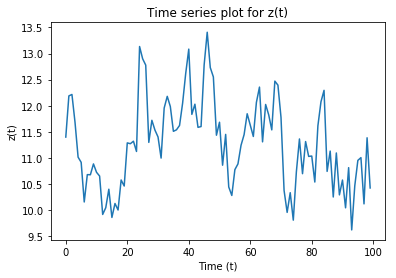

In [6]:
plt.plot(np.arange(100), Zmat[0:100])
plt.xlabel("Time (t)")
plt.ylabel("z(t)")
plt.title("Time series plot for z(t)")
plt.show()

In [7]:
# Solution 1.b.

In [8]:
z_vals = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 5)
print(z_vals)

[ 9.3  10.35 11.4  12.45 13.5 ]


In [9]:
# Solution 1.c.

In [10]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
P = np.zeros((5, 5))
z_t = z_0
bin_t = 3
for z_tp1 in Zmat:
    if z_tp1 <= z_cuts[0]:
        bin_tp1 = 1
    elif z_tp1 <= z_cuts[1]:
        bin_tp1 = 2
    elif z_tp1 <= z_cuts[2]:
        bin_tp1 = 3
    elif z_tp1 <= z_cuts[3]:
        bin_tp1 = 4
    else:
        bin_tp1 = 5
    P[bin_t - 1][bin_tp1 - 1] += 1
    bin_t = bin_tp1
    z_t = z_tp1
for i in range(5):
    P[i][:] = P[i][:] / sum(P[i][:])
print(P)

[[0.69387755 0.26530612 0.04081633 0.         0.        ]
 [0.09166667 0.55       0.325      0.03333333 0.        ]
 [0.03030303 0.21818182 0.48484848 0.23030303 0.03636364]
 [0.         0.04201681 0.34453782 0.50420168 0.1092437 ]
 [0.         0.         0.04166667 0.35416667 0.60416667]]


In [11]:
# Solution 1.d.

In [12]:
# Probability matrix for z_t+3 given by P * P * P
print("Transition probability from bin 3 at t to bin 5 at t + 3:")
(P @ P @ P)[3 - 1][5 - 1]

Transition probability from bin 3 at t to bin 5 at t + 3:


0.08032301133392175

In [13]:
# Solution 1.e.

In [14]:
import numpy.linalg as LA
X_0 = np.array([[0.2], [0.2], [0.2], [0.2], [0.2]])
X_stat = np.dot(LA.matrix_power(P.T, 100), X_0)
X_stat_new = np.dot(LA.matrix_power(P.T, 101), X_0)
print(X_stat - X_stat_new)
print("Clearly steady state has been reached by the 100th iteration")
print("The steady state vector is:")
print(X_stat)

[[ 7.34134975e-15]
 [ 6.27276009e-15]
 [-1.33226763e-15]
 [-7.18869408e-15]
 [-5.13478149e-15]]
Clearly steady state has been reached by the 100th iteration
The steady state vector is:
[[0.10436378]
 [0.24106445]
 [0.32506724]
 [0.23483199]
 [0.09467253]]


In [15]:
# Solution 1.f.

In [16]:
Zmat2 = np.zeros(T + 1)
bin_t = 2
Zmat2[0] = z_vals[2]
np.random.seed(25)
for i in range(T):
    z_tp1 = np.random.choice(z_vals, p=P[bin_t][:].flatten())
    Zmat2[i + 1] = z_tp1
    if z_tp1 <= z_cuts[0]:
        bin_t = 0
    elif z_tp1 <= z_cuts[1]:
        bin_t = 1
    elif z_tp1 <= z_cuts[2]:
        bin_t = 2
    elif z_tp1 <= z_cuts[3]:
        bin_t = 3
    else:
        bin_t = 4

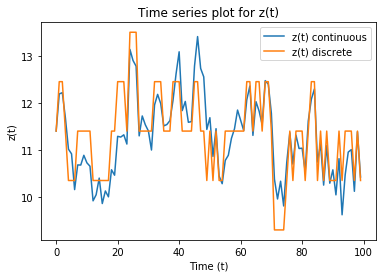

In [17]:
plt.plot(np.arange(100), Zmat[0:100], label="z(t) continuous")
plt.plot(np.arange(100), Zmat2[0:100], label="z(t) discrete")
plt.xlabel("Time (t)")
plt.ylabel("z(t)")
plt.title("Time series plot for z(t)")
plt.legend()
plt.show()